In [1]:

import json
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

In [2]:

rideshare_data = os.path.join("FHV_Base_Aggregate_Report.csv")
rideshare_data_df = pd.read_csv(rideshare_data)
rideshare_data_df.head()

,Base License Number,Base Name,DBA,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
0,B00053,CHARGE AND RIDE INC,NaN,2019,6,June,681,0,34
1,B02699,PRESIDENTIAL LUXURY LIMO INC.,NaN,2016,7,July,1170,0,32
2,B01176,SANTO DOMINGO CAR LIMO SERVICES INC,NaN,2015,4,April,19429,0,88
3,B00837,CAREY LIMO N Y INC,NaN,2020,3,March,4673,0,146
4,B02191,US LIMO SYSTEM INC,NaN,2016,7,July,769,0,27


In [3]:
uber_data_df =(rideshare_data_df.loc[rideshare_data_df['Base Name'] == 'UBER'])
uber_data_df = uber_data_df.dropna(how="any")
uber_data_df = uber_data_df[['Base Name', 'Year', 'Month', 'Month Name', 'Total Dispatched Trips', 'Total Dispatched Shared Trips', 'Unique Dispatched Vehicles']]
#reset index for uber only
uber_data_df.reset_index(drop=True, inplace=True)
uber_data_df

,Base Name,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
0,UBER,2018,8,August,14060879,4027450,72344
1,UBER,2015,3,March,2259575,0,14290
2,UBER,2015,12,December,4343828,0,28716
3,UBER,2020,2,February,15743375,1102238,68833
4,UBER,2015,1,January,1871075,0,12544
...,...,...,...,...,...,...,...
59,UBER,2018,7,July,14063243,3877702,71836
60,UBER,2016,12,December,7880513,0,46886
61,UBER,2018,11,November,14554993,3858407,76494
62,UBER,2015,2,February,2178305,0,13531


In [4]:
lyft_data_df = (rideshare_data_df.loc[rideshare_data_df['Base Name'] == 'LYFT'])
lyft_data_df = lyft_data_df.dropna(how="any")
lyft_data_df = lyft_data_df[['Base Name', 'Year', 'Month', 'Month Name', 'Total Dispatched Trips', 'Total Dispatched Shared Trips', 'Unique Dispatched Vehicles']]
#reset index for lyft only
lyft_data_df.reset_index(drop=True, inplace=True)
lyft_data_df

,Base Name,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
0,LYFT,2017,2,February,1619126,0,21715
1,LYFT,2016,6,June,1073973,0,15095
2,LYFT,2018,9,September,3960252,641585,43686
3,LYFT,2018,5,May,3400356,540029,38628
4,LYFT,2015,10,October,434476,0,6657
...,...,...,...,...,...,...,...
56,LYFT,2015,7,July,194815,0,3895
57,LYFT,2020,4,April,1143604,0,11665
58,LYFT,2015,8,August,318717,0,5016
59,LYFT,2017,1,January,1285621,0,19683


In [5]:
#2019 Uber data
uber_data_2019_df = (uber_data_df.loc[uber_data_df['Year'] == 2019])
uber_data_2019_df

,Base Name,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
7,UBER,2019,7,July,14042889,1528499,75420
11,UBER,2019,11,November,15610941,1156047,71965
20,UBER,2019,9,September,13964765,1428238,73065
21,UBER,2019,6,June,14396737,1245713,76681
23,UBER,2019,8,August,13925893,1484807,73692
25,UBER,2019,1,January,16184069,4110424,79178
28,UBER,2019,10,October,14509882,1275611,72581
32,UBER,2019,2,February,13503042,2945777,77712
33,UBER,2019,5,May,15876062,2031552,77654
45,UBER,2019,4,April,15657427,2520648,78257


In [6]:
#2019 lyft data
lyft_data_2019_df = (lyft_data_df.loc[lyft_data_df['Year'] == 2019])
lyft_data_2019_df

,Base Name,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
14,LYFT,2019,1,January,4623412,709716,50099
16,LYFT,2019,5,May,4681243,1108538,52592
18,LYFT,2019,2,February,4689540,1171771,50929
20,LYFT,2019,6,June,4998481,1197047,52185
21,LYFT,2019,4,April,4287895,1008642,53370
23,LYFT,2019,12,December,5430612,1417280,45310
29,LYFT,2019,8,August,4698486,1241250,48556
31,LYFT,2019,7,July,4682093,1134662,51316
45,LYFT,2019,11,November,5144737,1464222,44804
46,LYFT,2019,3,March,4696685,1147502,52436


In [7]:
#target_year 2019
merge_df = pd.merge(uber_data_2019_df, lyft_data_2019_df,how = 'outer', on='Month')
merge_df = merge_df[['Month', 'Month Name_x', 'Total Dispatched Trips_x', 'Total Dispatched Shared Trips_x', 'Unique Dispatched Vehicles_x', 'Total Dispatched Trips_y', 'Total Dispatched Shared Trips_y', 'Unique Dispatched Vehicles_y']]
merge_df = merge_df.sort_values('Month',ascending=True)
merge_df.set_index(["Month"], inplace = True)
merge_df
merge_df = merge_df.rename(columns={"Year_x": "Year"
                                    ,"Month Name_x":"Month"
                                    ,"Total Dispatched Trips_x":"Uber Trips"
                                    ,"Total Dispatched Shared Trips_x":"Uber Shared Trips"
                                    ,"Unique Dispatched Vehicles_x":"Uber Unique Vehicles"
                                    ,"Total Dispatched Trips_y":"Lyft Trips"
                                    ,"Total Dispatched Shared Trips_y":"Lyft Shared Trips"
                                    ,"Unique Dispatched Vehicles_y":"Lyft Unique Vehicles"})
merge_df

,Month,Uber Trips,Uber Shared Trips,Uber Unique Vehicles,Lyft Trips,Lyft Shared Trips,Lyft Unique Vehicles
Month,,,,,,,
1,January,16184069,4110424,79178,4623412,709716,50099
2,February,13503042,2945777,77712,4689540,1171771,50929
3,March,17247995,2973699,78973,4696685,1147502,52436
4,April,15657427,2520648,78257,4287895,1008642,53370
5,May,15876062,2031552,77654,4681243,1108538,52592
6,June,14396737,1245713,76681,4998481,1197047,52185
7,July,14042889,1528499,75420,4682093,1134662,51316
8,August,13925893,1484807,73692,4698486,1241250,48556
9,September,13964765,1428238,73065,4611514,1258443,48447


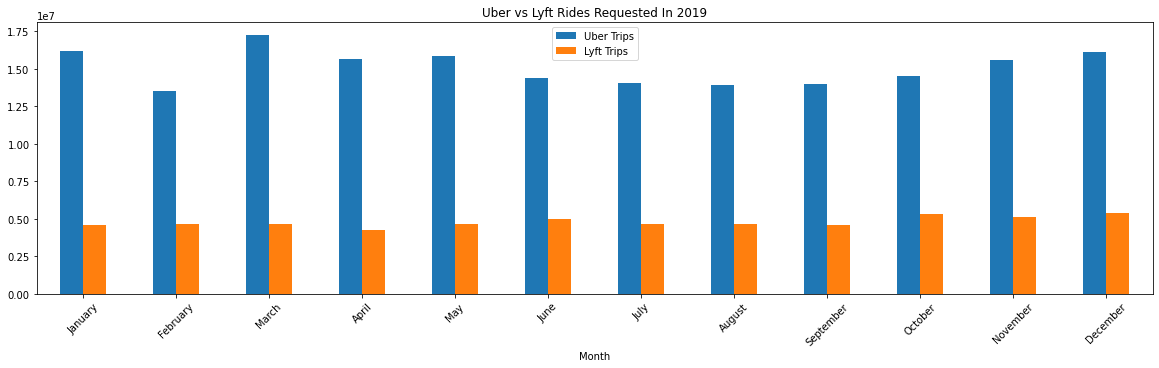

<Figure size 432x288 with 0 Axes>

In [8]:
merge_2019_df = merge_df[['Month', 'Uber Trips', 'Lyft Trips']]

#2019 number of rides uber vs lyft by month
multi_plot = merge_2019_df.plot(kind="bar", figsize=(20,5))

# set tick labels
multi_plot.set_xticklabels(merge_2019_df["Month"], rotation=45)
plt.title("Uber vs Lyft Rides Requested In 2019")
plt.show()
plt.tight_layout()

In [9]:
uber_data_2018_df = (uber_data_df.loc[uber_data_df['Year'] == 2018])
uber_data_2018_df

,Base Name,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
0,UBER,2018,8,August,14060879,4027450,72344
13,UBER,2018,9,September,14049967,3943561,74249
16,UBER,2018,2,February,11506356,2643389,65375
17,UBER,2018,5,May,13579992,3319850,70054
26,UBER,2018,3,March,13462091,3523078,66567
29,UBER,2018,1,January,11671765,2613169,65187
35,UBER,2018,10,October,14663999,4045741,75606
44,UBER,2018,4,April,13222485,3549372,67970
48,UBER,2018,12,December,14999895,3802083,78093
49,UBER,2018,6,June,13267600,3171911,71006


In [10]:
lyft_data_2018_df = (lyft_data_df.loc[lyft_data_df['Year'] == 2018])
lyft_data_2018_df

,Base Name,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
2,LYFT,2018,9,September,3960252,641585,43686
3,LYFT,2018,5,May,3400356,540029,38628
5,LYFT,2018,10,October,4246575,1024500,46167
7,LYFT,2018,3,March,3471602,641427,36783
11,LYFT,2018,12,December,4697772,691743,48773
13,LYFT,2018,11,November,4195596,540745,47723
26,LYFT,2018,2,February,3144050,659044,36614
37,LYFT,2018,7,July,3632375,615331,40899
40,LYFT,2018,6,June,3664808,602496,39519
47,LYFT,2018,4,April,3332985,557190,37429


In [11]:
merge_df = pd.merge(uber_data_2018_df, lyft_data_2018_df,how = 'outer', on='Month')
merge_df = merge_df[['Month', 'Month Name_x', 'Total Dispatched Trips_x', 'Total Dispatched Shared Trips_x', 'Unique Dispatched Vehicles_x', 'Total Dispatched Trips_y', 'Total Dispatched Shared Trips_y', 'Unique Dispatched Vehicles_y']]
merge_df = merge_df.sort_values('Month',ascending=True)
merge_df.set_index(["Month"], inplace = True)
merge_df
merge_df = merge_df.rename(columns={"Year_x": "Year"
                                    ,"Month Name_x":"Month"
                                    ,"Total Dispatched Trips_x":"Uber Trips"
                                    ,"Total Dispatched Shared Trips_x":"Uber Shared Trips"
                                    ,"Unique Dispatched Vehicles_x":"Uber Unique Vehicles"
                                    ,"Total Dispatched Trips_y":"Lyft Trips"
                                    ,"Total Dispatched Shared Trips_y":"Lyft Shared Trips"
                                    ,"Unique Dispatched Vehicles_y":"Lyft Unique Vehicles"})
merge_df

,Month,Uber Trips,Uber Shared Trips,Uber Unique Vehicles,Lyft Trips,Lyft Shared Trips,Lyft Unique Vehicles
Month,,,,,,,
1,January,11671765,2613169,65187,3141012,641261,36779
2,February,11506356,2643389,65375,3144050,659044,36614
3,March,13462091,3523078,66567,3471602,641427,36783
4,April,13222485,3549372,67970,3332985,557190,37429
5,May,13579992,3319850,70054,3400356,540029,38628
6,June,13267600,3171911,71006,3664808,602496,39519
7,July,14063243,3877702,71836,3632375,615331,40899
8,August,14060879,4027450,72344,3936418,620932,41968
9,September,14049967,3943561,74249,3960252,641585,43686


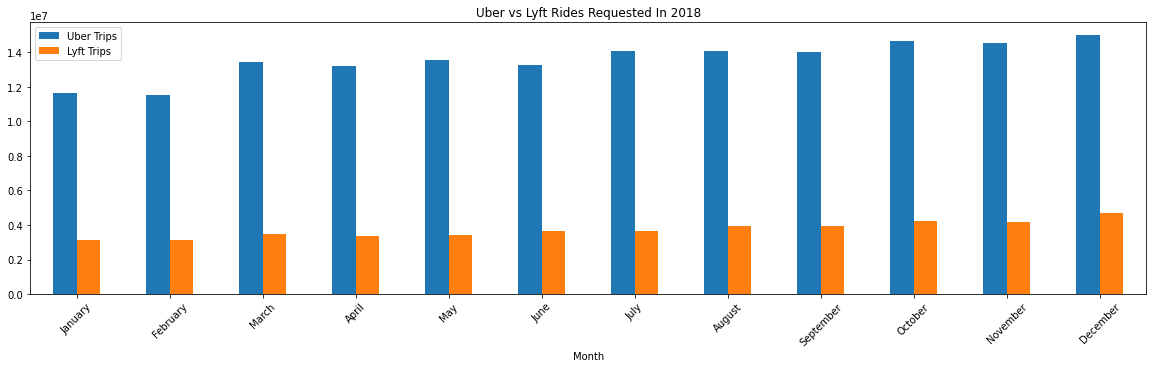

<Figure size 432x288 with 0 Axes>

In [12]:
merge_2018_df = merge_df[['Month', 'Uber Trips', 'Lyft Trips']]

#2019 number of rides uber vs lyft by month
multi_plot = merge_2018_df.plot(kind="bar", figsize=(20,5))

# set tick labels
multi_plot.set_xticklabels(merge_2019_df["Month"], rotation=45)
plt.title("Uber vs Lyft Rides Requested In 2018")
plt.show()
plt.tight_layout()

In [13]:
uber_data_2017_df = (uber_data_df.loc[uber_data_df['Year'] == 2017])
uber_data_2017_df

,Base Name,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
5,UBER,2017,1,January,7736951,0,48451
6,UBER,2017,7,July,8962215,1120206,58215
8,UBER,2017,11,November,10693287,2106689,62549
10,UBER,2017,5,May,8794695,0,54465
22,UBER,2017,4,April,8181383,0,51875
31,UBER,2017,2,February,7244518,0,48847
34,UBER,2017,10,October,10135304,1585613,61613
37,UBER,2017,12,December,11836385,2455725,64294
40,UBER,2017,6,June,8898156,1096338,56712
54,UBER,2017,3,March,8641724,0,49990


In [14]:
lyft_data_2017_df = (lyft_data_df.loc[lyft_data_df['Year'] == 2017])
lyft_data_2017_df

,Base Name,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
0,LYFT,2017,2,February,1619126,0,21715
10,LYFT,2017,10,October,2904741,560310,34304
24,LYFT,2017,3,March,1923915,0,22332
27,LYFT,2017,8,August,2384976,412024,29889
28,LYFT,2017,6,June,2010328,367368,26447
32,LYFT,2017,7,July,2278279,420460,28267
33,LYFT,2017,11,November,2692200,482828,34869
41,LYFT,2017,4,April,1766732,0,23250
43,LYFT,2017,5,May,1934661,0,24962
49,LYFT,2017,12,December,3031881,573577,35077


In [15]:
merge_df = pd.merge(uber_data_2017_df, lyft_data_2017_df,how = 'outer', on='Month')
merge_df = merge_df[['Month', 'Month Name_x', 'Total Dispatched Trips_x', 'Total Dispatched Shared Trips_x', 'Unique Dispatched Vehicles_x', 'Total Dispatched Trips_y', 'Total Dispatched Shared Trips_y', 'Unique Dispatched Vehicles_y']]
merge_df = merge_df.sort_values('Month',ascending=True)
merge_df.set_index(["Month"], inplace = True)
merge_df
merge_df = merge_df.rename(columns={"Year_x": "Year"
                                    ,"Month Name_x":"Month"
                                    ,"Total Dispatched Trips_x":"Uber Trips"
                                    ,"Total Dispatched Shared Trips_x":"Uber Shared Trips"
                                    ,"Unique Dispatched Vehicles_x":"Uber Unique Vehicles"
                                    ,"Total Dispatched Trips_y":"Lyft Trips"
                                    ,"Total Dispatched Shared Trips_y":"Lyft Shared Trips"
                                    ,"Unique Dispatched Vehicles_y":"Lyft Unique Vehicles"})
merge_df

,Month,Uber Trips,Uber Shared Trips,Uber Unique Vehicles,Lyft Trips,Lyft Shared Trips,Lyft Unique Vehicles
Month,,,,,,,
1,January,7736951,0,48451,1285621,0,19683
2,February,7244518,0,48847,1619126,0,21715
3,March,8641724,0,49990,1923915,0,22332
4,April,8181383,0,51875,1766732,0,23250
5,May,8794695,0,54465,1934661,0,24962
6,June,8898156,1096338,56712,2010328,367368,26447
7,July,8962215,1120206,58215,2278279,420460,28267
8,August,8992847,1290877,58787,2384976,412024,29889
9,September,9525248,1449643,60011,2528638,445088,31416


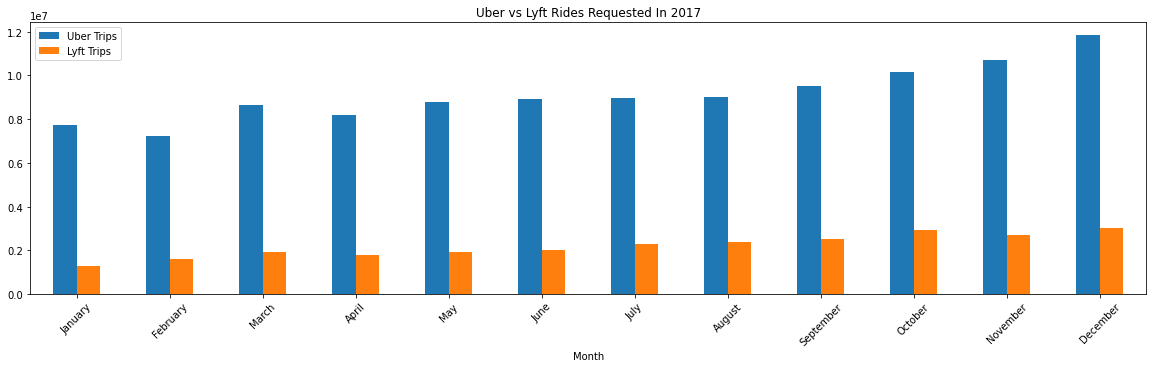

<Figure size 432x288 with 0 Axes>

In [16]:
merge_2017_df = merge_df[['Month', 'Uber Trips', 'Lyft Trips']]

#2019 number of rides uber vs lyft by month
multi_plot = merge_2017_df.plot(kind="bar", figsize=(20,5))

# set tick labels
multi_plot.set_xticklabels(merge_2019_df["Month"], rotation=45)
plt.title("Uber vs Lyft Rides Requested In 2017")
plt.show()
plt.tight_layout()

In [17]:
uber_data_2016_df = (uber_data_df.loc[uber_data_df['Year'] == 2016])
uber_data_2016_df

,Base Name,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
15,UBER,2016,6,June,5358138,0,34327
18,UBER,2016,11,November,6973356,0,45182
19,UBER,2016,7,July,5899045,0,35765
38,UBER,2016,9,September,6481751,0,43131
39,UBER,2016,10,October,7007436,0,44076
41,UBER,2016,3,March,4949743,0,29835
43,UBER,2016,8,August,5893649,0,40336
52,UBER,2016,1,January,4301254,0,29665
53,UBER,2016,5,May,5391879,0,32505
56,UBER,2016,2,February,4827339,0,29538


In [18]:
lyft_data_2016_df = (lyft_data_df.loc[lyft_data_df['Year'] == 2016])
lyft_data_2016_df

,Base Name,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
1,LYFT,2016,6,June,1073973,0,15095
12,LYFT,2016,4,April,810447,0,10865
15,LYFT,2016,1,January,564149,0,9858
19,LYFT,2016,3,March,691455,0,9266
25,LYFT,2016,11,November,1112720,0,16639
30,LYFT,2016,7,July,951376,0,14442
34,LYFT,2016,2,February,667766,0,9734
35,LYFT,2016,12,December,1272827,0,17656
36,LYFT,2016,10,October,1112748,0,15926
39,LYFT,2016,8,August,1095428,0,15033


In [19]:
merge_df = pd.merge(uber_data_2016_df, lyft_data_2016_df,how = 'outer', on='Month')
merge_df = merge_df[['Month', 'Month Name_x', 'Total Dispatched Trips_x', 'Total Dispatched Shared Trips_x', 'Unique Dispatched Vehicles_x', 'Total Dispatched Trips_y', 'Total Dispatched Shared Trips_y', 'Unique Dispatched Vehicles_y']]
merge_df = merge_df.sort_values('Month',ascending=True)
merge_df.set_index(["Month"], inplace = True)
merge_df
merge_df = merge_df.rename(columns={"Year_x": "Year"
                                    ,"Month Name_x":"Month"
                                    ,"Total Dispatched Trips_x":"Uber Trips"
                                    ,"Total Dispatched Shared Trips_x":"Uber Shared Trips"
                                    ,"Unique Dispatched Vehicles_x":"Uber Unique Vehicles"
                                    ,"Total Dispatched Trips_y":"Lyft Trips"
                                    ,"Total Dispatched Shared Trips_y":"Lyft Shared Trips"
                                    ,"Unique Dispatched Vehicles_y":"Lyft Unique Vehicles"})
merge_df

,Month,Uber Trips,Uber Shared Trips,Uber Unique Vehicles,Lyft Trips,Lyft Shared Trips,Lyft Unique Vehicles
Month,,,,,,,
1,January,4301254,0,29665,564149,0,9858
2,February,4827339,0,29538,667766,0,9734
3,March,4949743,0,29835,691455,0,9266
4,April,5103751,0,30702,810447,0,10865
5,May,5391879,0,32505,994444,0,12955
6,June,5358138,0,34327,1073973,0,15095
7,July,5899045,0,35765,951376,0,14442
8,August,5893649,0,40336,1095428,0,15033
9,September,6481751,0,43131,1068625,0,15374


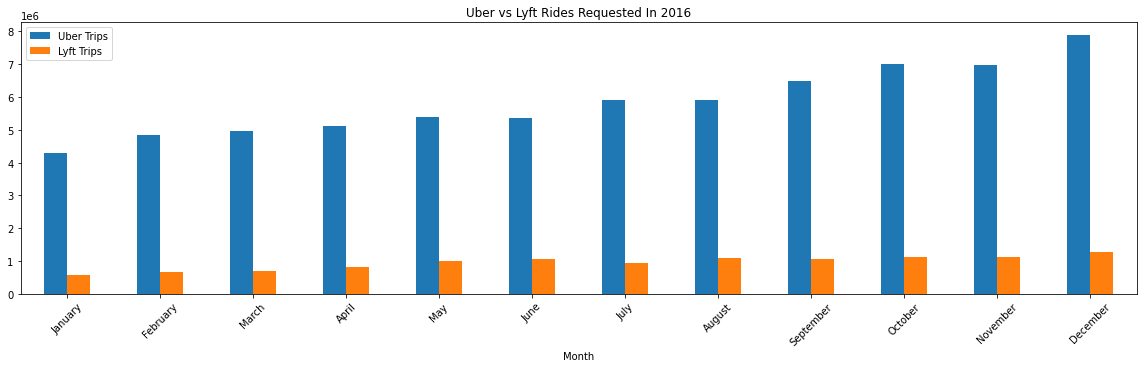

<Figure size 432x288 with 0 Axes>

In [20]:

merge_2016_df = merge_df[['Month', 'Uber Trips', 'Lyft Trips']]

#2019 number of rides uber vs lyft by month
multi_plot = merge_2016_df.plot(kind="bar", figsize=(20,5))

# set tick labels
multi_plot.set_xticklabels(merge_2019_df["Month"], rotation=45)
plt.title("Uber vs Lyft Rides Requested In 2016")
plt.show()
plt.tight_layout()

In [21]:
uber_data_2015_df = (uber_data_df.loc[uber_data_df['Year'] == 2015])
uber_data_2015_df

,Base Name,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
1,UBER,2015,3,March,2259575,0,14290
2,UBER,2015,12,December,4343828,0,28716
4,UBER,2015,1,January,1871075,0,12544
9,UBER,2015,9,September,3709270,0,25035
14,UBER,2015,6,June,2816572,0,18751
27,UBER,2015,10,October,4359759,0,26875
30,UBER,2015,7,July,3107558,0,21616
36,UBER,2015,4,April,2280332,0,14952
42,UBER,2015,5,May,1854691,0,12472
47,UBER,2015,8,August,3316381,0,23350


In [22]:
lyft_data_2015_df = (lyft_data_df.loc[lyft_data_df['Year'] == 2015])
lyft_data_2015_df

,Base Name,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
4,LYFT,2015,10,October,434476,0,6657
6,LYFT,2015,11,November,450483,0,7023
8,LYFT,2015,4,April,80613,0,2519
38,LYFT,2015,9,September,399622,0,5592
44,LYFT,2015,5,May,100862,0,2701
55,LYFT,2015,12,December,524782,0,6830
56,LYFT,2015,7,July,194815,0,3895
58,LYFT,2015,8,August,318717,0,5016
60,LYFT,2015,6,June,111111,0,2963


In [23]:
merge_df = pd.merge(uber_data_2015_df, lyft_data_2015_df,how = 'outer', on='Month')
merge_df = merge_df[['Month', 'Month Name_x', 'Total Dispatched Trips_x', 'Total Dispatched Shared Trips_x', 'Unique Dispatched Vehicles_x', 'Total Dispatched Trips_y', 'Total Dispatched Shared Trips_y', 'Unique Dispatched Vehicles_y']]
merge_df = merge_df.sort_values('Month',ascending=True)
merge_df.set_index(["Month"], inplace = True)
merge_df
merge_df = merge_df.rename(columns={"Year_x": "Year"
                                    ,"Month Name_x":"Month"
                                    ,"Total Dispatched Trips_x":"Uber Trips"
                                    ,"Total Dispatched Shared Trips_x":"Uber Shared Trips"
                                    ,"Unique Dispatched Vehicles_x":"Uber Unique Vehicles"
                                    ,"Total Dispatched Trips_y":"Lyft Trips"
                                    ,"Total Dispatched Shared Trips_y":"Lyft Shared Trips"
                                    ,"Unique Dispatched Vehicles_y":"Lyft Unique Vehicles"})
merge_df

,Month,Uber Trips,Uber Shared Trips,Uber Unique Vehicles,Lyft Trips,Lyft Shared Trips,Lyft Unique Vehicles
Month,,,,,,,
1,January,1871075,0,12544,NaN,NaN,NaN
2,February,2178305,0,13531,NaN,NaN,NaN
3,March,2259575,0,14290,NaN,NaN,NaN
4,April,2280332,0,14952,80613.0,0.0,2519.0
5,May,1854691,0,12472,100862.0,0.0,2701.0
6,June,2816572,0,18751,111111.0,0.0,2963.0
7,July,3107558,0,21616,194815.0,0.0,3895.0
8,August,3316381,0,23350,318717.0,0.0,5016.0
9,September,3709270,0,25035,399622.0,0.0,5592.0


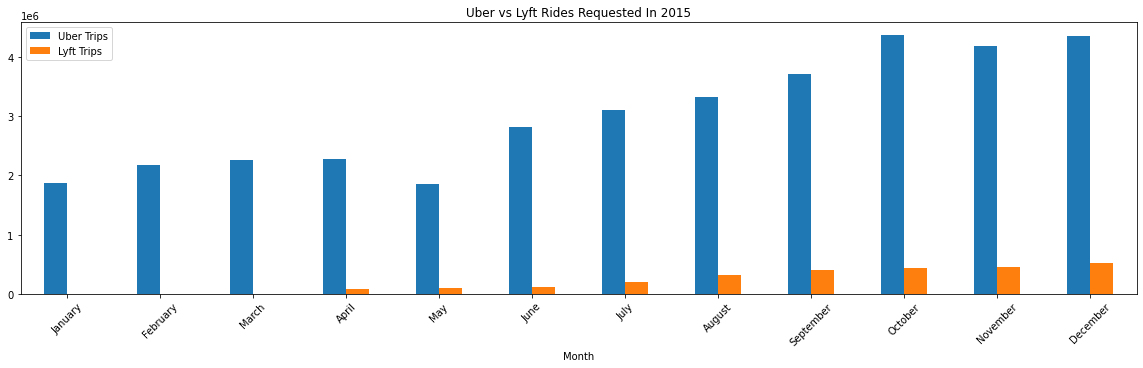

<Figure size 432x288 with 0 Axes>

In [24]:

merge_2015_df = merge_df[['Month', 'Uber Trips', 'Lyft Trips']]

#2019 number of rides uber vs lyft by month
multi_plot = merge_2015_df.plot(kind="bar", figsize=(20,5))

# set tick labels
multi_plot.set_xticklabels(merge_2019_df["Month"], rotation=45)
plt.title("Uber vs Lyft Rides Requested In 2015")
plt.show()
plt.tight_layout()

In [25]:
merge_df = pd.merge(uber_data_df, lyft_data_df,how = 'outer', on='Month')
merge_df = merge_df[['Month', 'Month Name_x', 'Total Dispatched Trips_x', 'Total Dispatched Shared Trips_x', 'Unique Dispatched Vehicles_x', 'Total Dispatched Trips_y', 'Total Dispatched Shared Trips_y', 'Unique Dispatched Vehicles_y']]
merge_df = merge_df.sort_values('Month',ascending=True)
merge_df.set_index(["Month"], inplace = True)
merge_df
merge_df = merge_df.rename(columns={"Year_x": "Year"
                                    ,"Month Name_x":"Month"
                                    ,"Total Dispatched Trips_x":"Uber Trips"
                                    ,"Total Dispatched Shared Trips_x":"Uber Shared Trips"
                                    ,"Unique Dispatched Vehicles_x":"Uber Unique Vehicles"
                                    ,"Total Dispatched Trips_y":"Lyft Trips"
                                    ,"Total Dispatched Shared Trips_y":"Lyft Shared Trips"
                                    ,"Unique Dispatched Vehicles_y":"Lyft Unique Vehicles"})
merge_df

,Month,Uber Trips,Uber Shared Trips,Uber Unique Vehicles,Lyft Trips,Lyft Shared Trips,Lyft Unique Vehicles
Month,,,,,,,
1,January,16184069,4110424,79178,5274248,1319840,44285
1,January,1871075,0,12544,5274248,1319840,44285
1,January,16184069,4110424,79178,4623412,709716,50099
1,January,1871075,0,12544,4623412,709716,50099
1,January,1871075,0,12544,564149,0,9858
...,...,...,...,...,...,...,...
12,December,7880513,0,46886,5430612,1417280,45310
12,December,7880513,0,46886,1272827,0,17656
12,December,7880513,0,46886,3031881,573577,35077


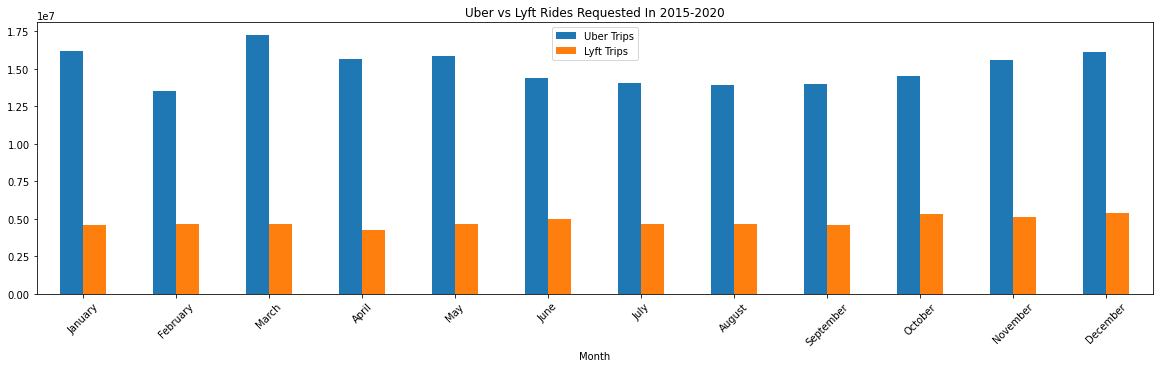

<Figure size 432x288 with 0 Axes>

In [26]:
merge_total_df = merge_df[['Month', 'Uber Trips', 'Lyft Trips']]

#2019 number of rides uber vs lyft by month
multi_plot = merge_2019_df.plot(kind="bar", figsize=(20,5))

# set tick labels
multi_plot.set_xticklabels(merge_2019_df["Month"], rotation=45)
plt.title("Uber vs Lyft Rides Requested In 2015-2020")
plt.show()
plt.tight_layout()